# Working with Structured Data

- read data from local files
- read CSV and JSON
- first steps data analysis with data frames and the [pandas library](https://pandas.pydata.org/)
- basic plotting of data


## Example: “Tree Cadastre of the City of Konstanz”

First, get the tree cadastre data from the [open data portal of the city of Konstanz](https://offenedaten-konstanz.de/dataset/baumkataster-konstanz). Save it on the file path shown below. The CSV file is then loaded into a pandas "DataFrame":

In [1]:
import pandas as pd

tree_cadastre_file = './data/KN_Baumkataster_2020.csv'
df = pd.read_csv(tree_cadastre_file)
df.shape  # table size (rows, columns)

(15711, 13)

Note: Pandas could read the CSV directly from the WWW if a URL is passed. With internet access and supposed the download URL is still valid, the data frame is also loaded by
```python
df = pd.read_csv('https://opendata.arcgis.com/datasets/c160f0a79a584ddf80cc65477fe58f4e_0.csv')
```

But lets have a first and quick look into the data using pandas methods:

In [2]:
df.head() # first lines of the table

,X,Y,OBJECTID,baumId,baumNr,baumart,hoeheM,kronendurchmesserM,stammumfangCM,location,Name_dt,Name_lat,AGOL_Name
0,9.159063,47.739307,1,2,1,52,12.0,6,72.0,Bubenbad Dingelsdorf (754),"Erle, Schwarz-Erle",Alnus glutinosa,Alnus
1,9.158918,47.739471,2,4,4,182,11.0,12,169.0,Bubenbad Dingelsdorf (754),"Nussbaum, Walnuss",Juglans regia,Juglans
2,9.159193,47.739428,3,5,3,52,11.0,7,74.0,Bubenbad Dingelsdorf (754),"Erle, Schwarz-Erle",Alnus glutinosa,Alnus
3,9.158987,47.739541,4,6,5,37,14.0,7,135.0,Bubenbad Dingelsdorf (754),"Ahorn, Berg-Ahorn",Acer pseudoplatanus,Acer
4,9.159219,47.739676,5,9,8,284,22.0,20,380.0,Bubenbad Dingelsdorf (754),"Pappel, Schwarz-Pappel",Populus nigra,Populus


In [3]:
df.describe() # descriptive statistics (numerical columns)

,X,Y,OBJECTID,baumId,baumNr,baumart,hoeheM,kronendurchmesserM,stammumfangCM
count,15711.000000,15711.000000,15711.000000,15711.000000,15711.000000,15711.000000,15706.000000,15711.000000,15704.000000
mean,9.169897,47.681721,7856.000000,13361.111832,57.941315,307.457959,10.688718,6.124944,113.009488
std,0.022084,0.023527,4535.519375,9558.292963,109.965696,206.677390,6.416883,3.883879,83.834009
min,9.106630,47.653444,1.000000,2.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,9.153555,47.666961,3928.500000,5844.500000,5.000000,77.000000,5.000000,3.000000,50.000000
50%,9.170588,47.674747,7856.000000,12181.000000,20.000000,322.000000,9.000000,6.000000,93.000000
75%,9.180610,47.683773,11783.500000,17923.500000,58.000000,501.000000,15.000000,8.000000,157.000000
max,9.217534,47.748520,15711.000000,39080.000000,805.000000,637.000000,40.000000,30.000000,900.000000


In [4]:
df.nunique() # number of unique values in each column

X                     15705
Y                     15705
OBJECTID              15711
baumId                15711
baumNr                  801
baumart                 296
hoeheM                   36
kronendurchmesserM       26
stammumfangCM           464
location                775
Name_dt                 294
Name_lat                296
AGOL_Name                35
dtype: int64

... and we identify the following columns (cf. the provided [tree cadastre metadata](https://offenedaten-konstanz.de/dataset/baumkataster-konstanz/resource/ed175ffd-96c9-45f7-9e6c-ec9fc40d1d04)):

- the pandas row index
- "X" and "Y": geographic coordinates (longitude and latitude)
- "OBJECTID", "baumid", "baumNr": three different tree IDs
- "baumart": a nummeric species ID
- "hoeheM": the tree height (m)
- "kronendurchmesserM": treetop diameter (m)
- "stammumfangCM": trunk perimeter (cm)
- "location": coarse location of the tree (street name)
- "Name_dt": German tree name
- "Name_lat": Latin tree name
- "AGOL_Name": vendor-specific name ("AGOL" = "ArcGIS Online")

We clean up the data a little bit:
- translate the German column names
- drop the columns not used later on
- use the column "OBJECTID" as row index

In [5]:
df.rename(columns={'hoeheM': 'height (m)',
                   'kronendurchmesserM': 'treetop diameter (m)',
                   'stammumfangCM': 'trunk perimeter (cm)'},
          inplace=True)
df.drop(columns=['baumId', 'baumNr', 'baumart', 'AGOL_Name'], inplace=True)
df.set_index('OBJECTID', inplace=True)
df.head()

,X,Y,height (m),treetop diameter (m),trunk perimeter (cm),location,Name_dt,Name_lat
OBJECTID,,,,,,,,
1,9.159063,47.739307,12.0,6,72.0,Bubenbad Dingelsdorf (754),"Erle, Schwarz-Erle",Alnus glutinosa
2,9.158918,47.739471,11.0,12,169.0,Bubenbad Dingelsdorf (754),"Nussbaum, Walnuss",Juglans regia
3,9.159193,47.739428,11.0,7,74.0,Bubenbad Dingelsdorf (754),"Erle, Schwarz-Erle",Alnus glutinosa
4,9.158987,47.739541,14.0,7,135.0,Bubenbad Dingelsdorf (754),"Ahorn, Berg-Ahorn",Acer pseudoplatanus
5,9.159219,47.739676,22.0,20,380.0,Bubenbad Dingelsdorf (754),"Pappel, Schwarz-Pappel",Populus nigra


## Count Items

In [6]:
# count tree names and show the N most frequent tree names
N = 20
top_trees = df['Name_lat'].value_counts().head(N).to_frame()
top_trees

,Name_lat
Platanus x acerifolia,887
Betula pendula,809
Quercus robur,667
Fraxinus excelsior,614
Tilia cordata,605
Malus domestica,539
Salix alba,536
Acer platanoides,523
Acer pseudoplatanus,517
Pyrus communis,513


In [7]:
# also show the top N German names
df['Name_dt'].value_counts().head(20).to_frame()

,Name_dt
Platane,952
"Birke, Sand-Birke",809
"Eiche, Stiel-Eiche, Sommer-Eiche",667
"Esche, Esche gemeine",614
"Linde, Winter-Linde",605
Kultur-Apfel,539
"Weide, Silber-Weide",536
"Ahorn, Spitz-Ahorn",523
"Ahorn, Berg-Ahorn",517
"Birne, Holz-Birne",513


Obviously, German names are less specific (there are more items of "Platane" than "Platanus x acerifolia"). To avoid inconsistencies we'll use the Latin names in the next steps. Because not everybody knows Latin well enough or studied botanology, let's prepare a translation table to see the Latin and German names site by site. We will later look how we could get the tree names in other languages as well.

In [8]:
tree_name_translation = df.loc[df['Name_lat'].isin(top_trees.index),
                               ['Name_lat', 'Name_dt']]
tree_name_translation['count'] = 1
tree_name_translation.groupby(['Name_lat', 'Name_dt']).sum() \
    .sort_values('count', ascending=False)

,,count
Name_lat,Name_dt,
Platanus x acerifolia,Platane,887
Betula pendula,"Birke, Sand-Birke",809
Quercus robur,"Eiche, Stiel-Eiche, Sommer-Eiche",667
Fraxinus excelsior,"Esche, Esche gemeine",614
Tilia cordata,"Linde, Winter-Linde",605
Malus domestica,Kultur-Apfel,539
Salix alba,"Weide, Silber-Weide",536
Acer platanoides,"Ahorn, Spitz-Ahorn",523
Acer pseudoplatanus,"Ahorn, Berg-Ahorn",517


## Plotting

We start with a first trivial scatter plot of the 3 metric values using the [plot method of the DataFrame](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html). We choose the [matplotlib's style "ggplot"](https://matplotlib.org/stable/gallery/style_sheets/ggplot.html) which mimics a popular plotting package for R. There are many more [styles available](https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html).

<AxesSubplot:xlabel='trunk perimeter (cm)', ylabel='height (m)'>

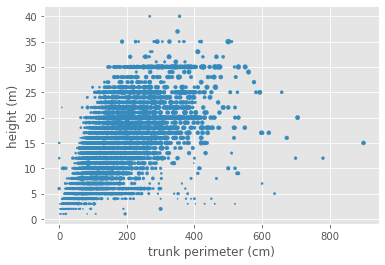

In [9]:
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')

df.plot(kind='scatter', x='trunk perimeter (cm)',
        y='height (m)', s='treetop diameter (m)')

Insights from the first plot:
- data gathering: heights above 25m are rather estimates
- some noise, eg. hight trees with thin truncs
- tree height and trunk circumference correlate

To take into account the tree types, we'll focus on the top-20 most frequent names only and plot them on a 4x5 matrix:

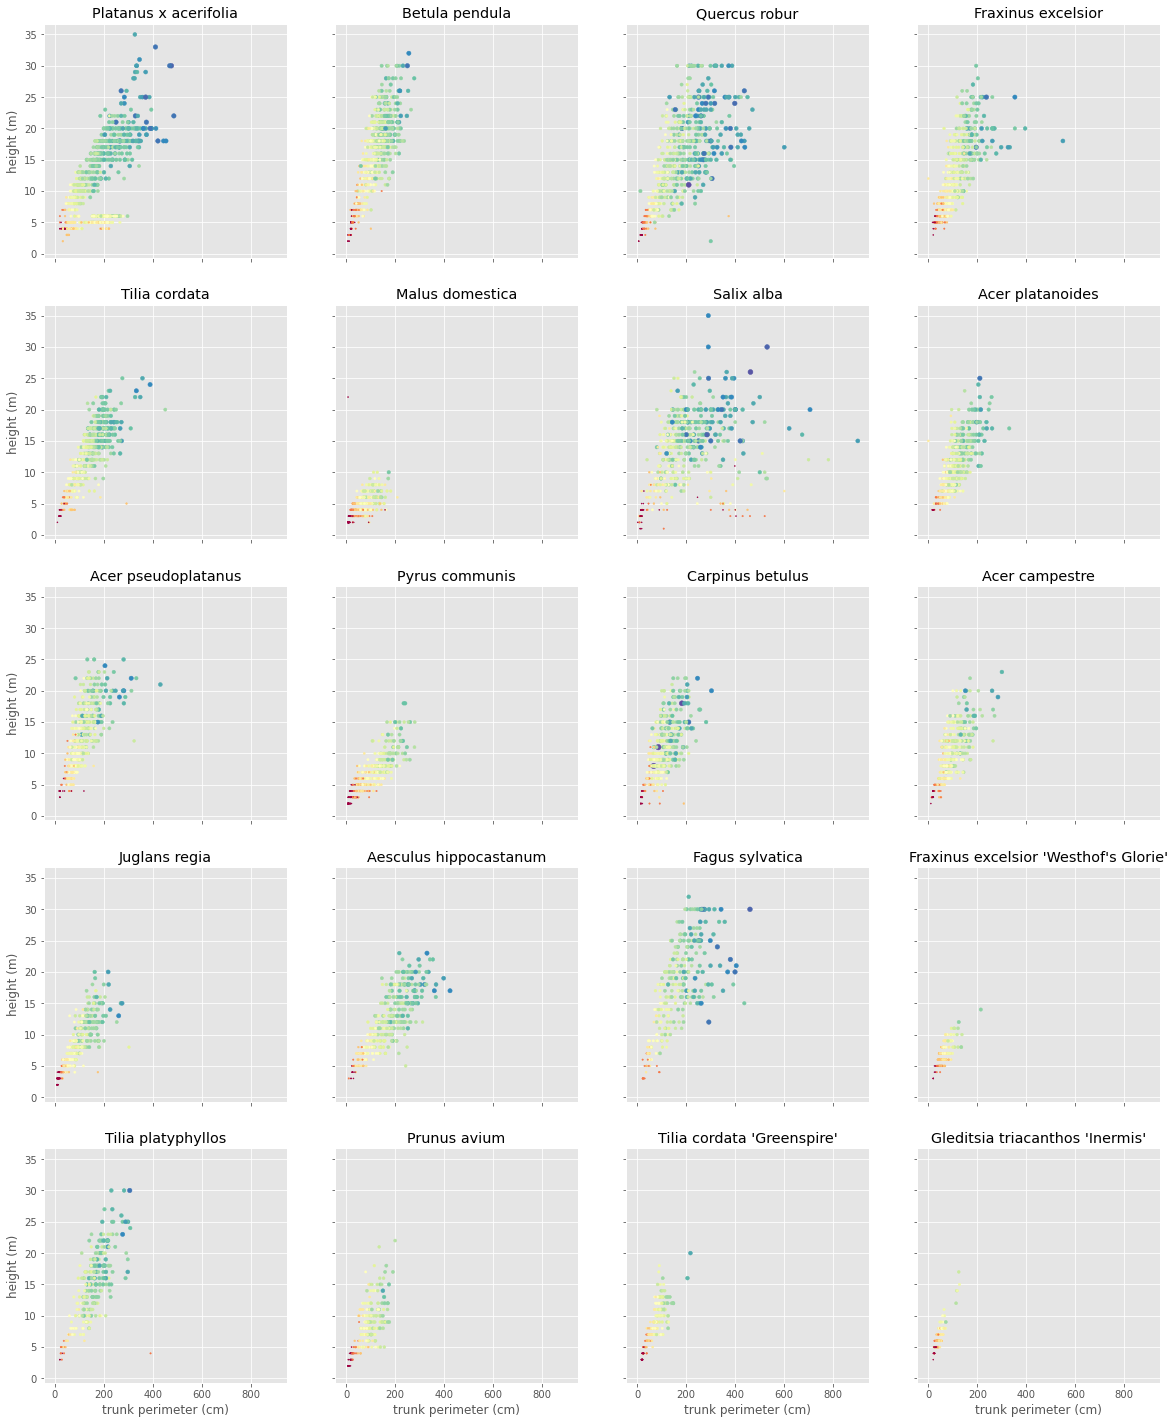

In [10]:
fig, axes = plt.subplots(nrows=5, ncols=4, sharex=True, sharey=True,
                         squeeze=False, figsize=[20,25])

n = 0
for tree in top_trees.index.to_list():
    plot = df[df['Name_lat']==tree].plot(
        kind='scatter',
        ax=axes[int(n/4),n%4],
        title=tree,
        x='trunk perimeter (cm)',
        y='height (m)',
        s='treetop diameter (m)', # show by point size
        c='treetop diameter (m)', # also indicated by color
        colormap='Spectral',
        norm=matplotlib.colors.LogNorm(vmin=1, vmax=25),
        colorbar=None)
    n += 1
plt.savefig('figures/trees_size_by_species.svg')

Notes about choosing the colormap for the treetop diameter:
- the point size is hard to catch, while color is easier to discriminate (if not colorblind)
- a spectral color map represents a continuous scale and allows for maximum discrimination
- the range 1m - 25m (few trees reach 30m) is mapped on a logarithmic scale to make the smaller diameters (60% are 6m or smaller) look more different for small trees

See below the plot of willows and apple trees side by side. Try to change the [color normalization](https://matplotlib.org/stable/gallery/userdemo/colormap_normalizations.html)!

In [11]:
# distribution of treetop diameters
df['treetop diameter (m)'].describe(percentiles=[i/20 for i in range(1, 20)])

count    15711.000000
mean         6.124944
std          3.883879
min          0.000000
5%           1.000000
10%          1.000000
15%          2.000000
20%          2.000000
25%          3.000000
30%          4.000000
35%          4.000000
40%          5.000000
45%          5.000000
50%          6.000000
55%          6.000000
60%          6.000000
65%          7.000000
70%          8.000000
75%          8.000000
80%          9.000000
85%         10.000000
90%         12.000000
95%         13.000000
max         30.000000
Name: treetop diameter (m), dtype: float64

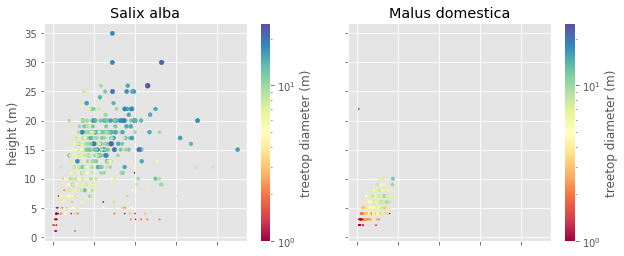

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True,
                         squeeze=False, figsize=[10,4])

n = 0
for tree in ['Salix alba', 'Malus domestica']:
    df[df['Name_lat']==tree].plot(
        kind='scatter',
        ax=axes[0,n],
        title=tree,
        x='trunk perimeter (cm)',
        y='height (m)',
        s='treetop diameter (m)',
        c='treetop diameter (m)',
        colormap='Spectral',
        norm=matplotlib.colors.LogNorm(vmin=1, vmax=25),
        #norm=matplotlib.colors.Normalize(vmin=1, vmax=25),
        colorbar=True)
    n += 1

## Processing JSON

[JSON](https://en.wikipedia.org/wiki/JSON) is a standardized and common data format to store and interchange data independent from any programming language. JSON data types are numbers, Unicode strings, boolean values, the `null` value (`None`), arrays (Python lists) and objects (Python dictionaries). The JSON data types and the JSON syntax are similar to Python. But there are subtle differences and we use the [json](https://docs.python.org/3/library/json.html) module of the Python standard libary to read or write JSON data:

In [13]:
import json

data = [{"key1": "value1", "key2": 2, 'key3': [1, 2, 3]}, True, False, None, 17, 1.123]
json_data = json.dumps(data)
json_data

'[{"key1": "value1", "key2": 2, "key3": [1, 2, 3]}, true, false, null, 17, 1.123]'

In [14]:
json.loads(json_data)

[{'key1': 'value1', 'key2': 2, 'key3': [1, 2, 3]},
 True,
 False,
 None,
 17,
 1.123]

In [15]:
# load translations of tree names from a JSON file
tree_translations = json.load(open('data/trees-wikispecies.json'))

In [16]:
list(tree_translations.keys())[:10]

['Platanus x acerifolia',
 'Platanus × hispanica',
 'Betula pendula',
 'Quercus robur',
 'Fraxinus excelsior',
 'Tilia cordata',
 'Malus domestica',
 'Salix alba',
 'Acer platanoides',
 'Acer pseudoplatanus']

### Remark: Get Translations from Wikispecies

The translations of the tree names were obtained from the [Wikispecies project](https://species.wikimedia.org/wiki/Main_Page) via the [Mediawiki API](https://www.mediawiki.org/wiki/API:Main_page). We will later learn how to use an [API](https://en.wikipedia.org/wiki/API) (Application Programming Interface) and how to send requests over the internet. But here very short 


```python
import json
import requests

query_params = {
    'action': 'query',
    'format': 'json',
    'prop': 'iwlinks|langlinks|description',
    'lllimit': 200,
    'llprop': 'url|langname'
}

trees_wikispecies = {}

for tree in top_trees.index.to_list():
    if tree in trees_wikispecies:
        continue
    query_params['titles'] = tree.replace(' ', '_')
    response = requests.get('https://species.wikimedia.org/w/api.php',
                            params=query_params)
    trees_wikispecies[tree] = json.loads(response.text)

with open('trees-wikispecies.json', 'w') as fp:
    json.dump(trees_wikispecies, fp)
```

The script [trees_wikispecies.py](./scripts/trees_wikispecies.py) was used to create the data file

Because the data was queried from Wikispecies, the values per tree represent response to a query and we need to navigate into the result object to get the translations.

In [17]:
tree_translations['Gleditsia triacanthos']

{'batchcomplete': '',
 'query': {'normalized': [{'from': 'Gleditsia_triacanthos',
    'to': 'Gleditsia triacanthos'}],
  'pages': {'124231': {'pageid': 124231,
    'ns': 0,
    'title': 'Gleditsia triacanthos',
    'iwlinks': [{'prefix': 'commons', '*': ''},
     {'prefix': 'commons', '*': 'Category:Gleditsia_triacanthos'},
     {'prefix': 'en', '*': 'International_Plant_Names_Index'},
     {'prefix': 'en', '*': 'Royal_Botanic_Gardens,_Kew'}],
    'langlinks': [{'lang': 'ar',
      'url': 'https://ar.wikipedia.org/wiki/%D8%BA%D9%84%D8%A7%D8%AF%D9%8A%D8%B4%D9%8A%D8%A9_%D8%AB%D9%84%D8%A7%D8%AB%D9%8A%D8%A9_%D8%A7%D9%84%D8%A3%D8%B4%D9%88%D8%A7%D9%83',
      'langname': 'Arabic',
      '*': 'غلاديشية ثلاثية الأشواك'},
     {'lang': 'az',
      'url': 'https://az.wikipedia.org/wiki/%C3%9C%C3%A7tikan_%C5%9Feytana%C4%9Fac%C4%B1',
      'langname': 'Azerbaijani',
      '*': 'Üçtikan şeytanağacı'},
     {'lang': 'ca',
      'url': 'https://ca.wikipedia.org/wiki/Ac%C3%A0cia_de_tres_punxes',
     

In [18]:
languages = ['en', 'fr', 'zh', 'ru']

# add new columns to cadastre table
for lang in languages:
    df['Name_' + lang] = pd.Series([''] * df.shape[0], index=df.index)

for tree in top_trees.index.to_list():
    if tree not in tree_translations:
        continue
    for _id, result in tree_translations[tree]['query']['pages'].items():
        for lang in languages:
            for langlink in result['langlinks']:
                if langlink['lang'] in languages:
                    # print(tree, langlink)
                    # add the translation to the table
                    df.loc[df['Name_lat']==tree, 'Name_' + langlink['lang']] = langlink['*']

In [19]:
name_cols = ['Name_lat', 'Name_dt', *['Name_' + lang for lang in languages]]

tree_name_translation = df.loc[df['Name_lat'].isin(top_trees.index), name_cols]
tree_name_translation['count'] = 1
tree_name_translation.groupby(name_cols).sum().sort_values('count', ascending=False)

,,,,,,count
Name_lat,Name_dt,Name_en,Name_fr,Name_zh,Name_ru,
Platanus x acerifolia,Platane,Platanus × acerifolia,Platane commun,英桐,Платан кленолистный,887
Betula pendula,"Birke, Sand-Birke",Betula pendula,Bouleau verruqueux,垂枝桦,Берёза повислая,809
Quercus robur,"Eiche, Stiel-Eiche, Sommer-Eiche",Quercus robur,Chêne pédonculé,夏櫟,Дуб черешчатый,667
Fraxinus excelsior,"Esche, Esche gemeine",Fraxinus excelsior,Frêne élevé,欧洲白蜡树,Ясень обыкновенный,614
Tilia cordata,"Linde, Winter-Linde",Tilia cordata,Tilleul à petites feuilles,小叶椴,Липа сердцевидная,605
Malus domestica,Kultur-Apfel,Malus domestica,Pommier domestique,,Яблоня домашняя,539
Salix alba,"Weide, Silber-Weide",Salix alba,Salix alba,白柳,Ива белая,536
Acer platanoides,"Ahorn, Spitz-Ahorn",Acer platanoides,Érable plane,挪威枫,Клён остролистный,523
Acer pseudoplatanus,"Ahorn, Berg-Ahorn",Acer pseudoplatanus,Érable sycomore,岩槭,Клён белый,517


### Remark: Advanced JSON processing with `jq`

Processing deeply nested JSON is cumbersome because the Pythone code may also require nested loops or recursive function calls. The JSON processor [jq](https://stedolan.github.io/jq/) allows for easy processing (filter and transform) of JSON data. There exist [Python bindings](https://en.wikipedia.org/wiki/Language_binding) but it is primarily a command-line tool:

1. download one tree record from Wikispecies using [curl](https://curl.se/):
   ```
   curl 'https://species.wikimedia.org/w/api.php?action=query&format=json&prop=iwlinks|langlinks|description&lllimit=200&llprop=url|langname&titles=Quercus_robur' \
       >data/wikispecies-quercus-robur.json
   ```
2. inspect the JSON result (nicely formatted):
   ```
   jq . <data/wikispecies-quercus-robur.json
   ```
3. step by step drill down to extract the data
   ```
   jq -r '.["query"]["pages"][]["langlinks"][] | [.["lang","*"]] | join("\t")' \
       <data/quercus_robur-wikimedia-species.json \
     | head
   ```
   which will extract a map <language,name_of_tree>:
   ```
af      Steeleik
ar      سنديان قوي
arz     سنديان قوى
ast     Quercus robur
az      Yay palıdı
azb     یای پالیدی
bat-smg Ōžouls
be      Дуб звычайны
bg      Обикновен дъб
bs      Hrast lužnjak
```

Using the [jq Python bindings](https://pypi.org/project/jq/) you could extract the data by ...

In [20]:
import jq

q = jq.compile('.["query"]["pages"][]["langlinks"][] | [.["lang","*"]]')
translations_quercus_robur = dict(
    q.input(
        json.load(
            open('data/quercus_robur-wikimedia-species.json'))).all())
translations_quercus_robur['fr']

'Chêne pédonculé'

## Links and References

- [Pandas getting started](https://pandas.pydata.org/docs/getting_started/index.html)
- [matplotlib cheatsheet](https://raw.githubusercontent.com/matplotlib/cheatsheets/master/cheatsheets.pdf) ([beginners sheet](https://raw.githubusercontent.com/matplotlib/cheatsheets/master/handout-beginner.pdf))
- [processing JSON data](https://datacarpentry.org/python-socialsci/07-json/index.html) from the course "Data Analysis and Visualization with Python for Social Scientists" (https://datacarpentry.org/python-socialsci/)